<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/lession2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.basics import *

In [0]:
n = 100

In [0]:
x = torch.ones(n,2)

In [0]:
x

In [7]:
x[:,0].uniform_(-1,1)
x[:5]

tensor([[ 0.4354,  1.0000],
        [ 0.5719,  1.0000],
        [-0.7468,  1.0000],
        [-0.8558,  1.0000],
        [ 0.7257,  1.0000]])

In [8]:
a = tensor(3.,2)
a

tensor([3., 2.])

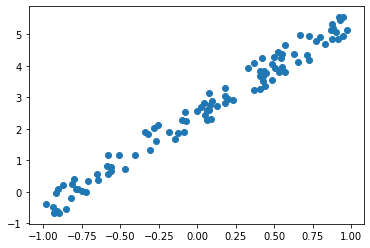

In [9]:
y = x@a + torch.rand(n)
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat,y):
  return ((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [12]:
y_hat = x@a
mse(y_hat,y)

tensor(8.6522)

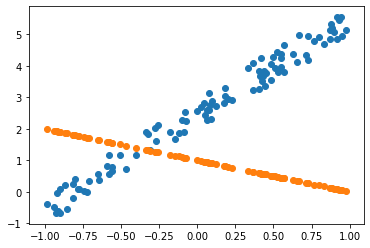

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [38]:
a = tensor(-1.,1)
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat,y)
  if t%10 ==0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [40]:
lr = 1e-1
for t in range(100): update()

tensor(8.6522, grad_fn=<MeanBackward0>)
tensor(1.3307, grad_fn=<MeanBackward0>)
tensor(0.3657, grad_fn=<MeanBackward0>)
tensor(0.1447, grad_fn=<MeanBackward0>)
tensor(0.0922, grad_fn=<MeanBackward0>)
tensor(0.0797, grad_fn=<MeanBackward0>)
tensor(0.0767, grad_fn=<MeanBackward0>)
tensor(0.0760, grad_fn=<MeanBackward0>)
tensor(0.0759, grad_fn=<MeanBackward0>)
tensor(0.0758, grad_fn=<MeanBackward0>)


In [41]:
x@a

tensor([ 3.7734,  4.1832,  0.2222, -0.1054,  4.6454,  3.0031,  3.0146,  5.2536,
         2.1634,  1.6532,  0.7238,  4.3433,  3.6910,  3.5689,  3.7247,  1.4490,
         3.8121,  0.0097,  2.6982,  5.2279,  4.1220,  0.7229,  0.7880,  5.1700,
         1.0552,  3.5700,  3.1589,  0.3390,  1.9211,  2.8428,  2.4544,  1.6265,
         2.6499,  0.5147,  0.0573,  3.0692,  2.7188,  5.3068,  5.2179,  5.0813,
         4.6521,  3.6858,  2.6240,  4.1104,  0.2998,  4.4276,  1.4994,  2.6027,
        -0.4955,  3.9662,  2.7483,  3.9222,  4.9629,  4.8561,  2.6592,  0.6937,
         0.9434,  2.5446,  3.0014,  2.7351, -0.1510,  0.7780,  2.2442,  3.9211,
         2.2077, -0.2320, -0.2740,  5.3172,  4.0547,  3.7915,  3.4571,  2.2193,
         5.0967,  3.7527,  4.0362,  4.7738,  0.0187,  1.5362,  1.2575,  5.1152,
         0.1308,  5.0838, -0.2458, -0.3517,  4.6055,  2.0976,  2.0304,  4.1072,
         4.4786,  3.6951,  1.6932,  3.7414, -0.2992,  3.9887,  0.1064,  0.5317,
         5.3890,  4.1676,  2.7030, -0.32

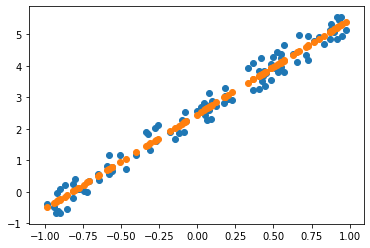

In [43]:
# a
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],(x@a).detach().numpy());

In [0]:
from matplotlib import animation,rc
rc('animation',html='jshtml')

In [48]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0],y,c='orange')
line, = plt.plot(x[:,0],(x@a).detach().numpy())
plt.close()

def animate(i):
  update()
  line.set_ydata((x@a).detach().numpy())
  return line,

animation.FuncAnimation(fig,animate,np.arange(0,100),interval=20)